In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline


Download the data from 

https://drive.google.com/open?id=0B28c493CP9GtMzN1emFoMkJNNlU


# First Look At The Data

In [2]:
hubway_data = pd.read_csv('hubway_trips.csv', low_memory=False)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


---

# A little data manipulation

In [84]:
check_out_year = hubway_data['start_date'].apply(lambda s: int(s[-13:-9]))
age_col = (check_out_year - hubway_data['birth_date'])

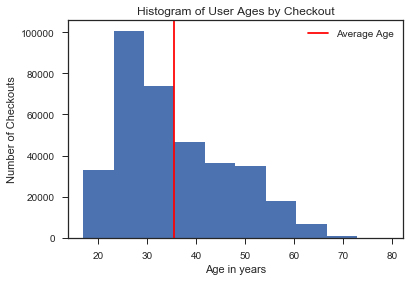

In [85]:
#And now for our first plot: a histogram of ages
plt.hist(age_col.dropna())
plt.title('Histogram of User Ages by Checkout')
plt.xlabel('Age in years')
plt.ylabel('Number of Checkouts')
plt.axvline(x=np.mean(age_col.dropna()), color='red', label='Average Age')
plt.legend()
plt.show()


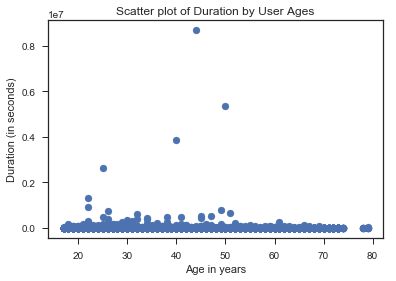

In [89]:
#And now for a second plot: scatter plot of age 
plt.scatter(age_col,hubway_data.duration)
plt.title('Scatter plot of Duration by User Ages')
plt.xlabel('Age in years')
plt.ylabel('Duration (in seconds)')
#plt.yscale('log')
plt.show()

In [64]:
#let's look at some subgroups
print(np.unique(hubway_data.subsc_type,return_counts=True))

(array(['Casual', 'Registered'], dtype=object), array([ 472611, 1106414]))


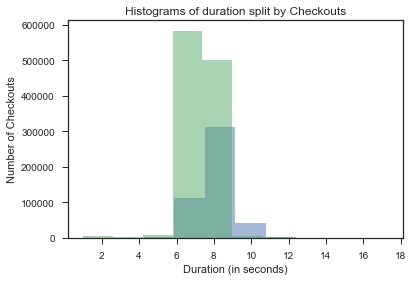

In [82]:
#And now for a plot of histograms across registration type
duration_registered = (hubway_data.duration[hubway_data.subsc_type == 'Registered'])
duration_casual = (hubway_data.duration[hubway_data.subsc_type == 'Casual'])


plt.hist(logduration_casual.dropna()+1, alpha=.5)
plt.hist(logduration_registered.dropna()+1, alpha=.5)
plt.title('Histograms of duration split by Checkouts')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Number of Checkouts')
#plt.xscale('log')

plt.show()